In [1]:
%matplotlib inline
import os
import fluiddyn as fld

# Tutorial: working in the laboratory (user perspective)

FluidDyn uses the object-oriented programming concepts. It deals with objects, which is a very natural way to represent and drive
experiments since experiments consist in objects interacting with each other.

Regarding the laboratory, each physical object (a pump, a traverse, a probe, an acquisition board, a tank filled with a stratified fluid...) is represented and controlled by an instance of a class. The experimental results can also be represented by other types of objects.

## Example of a conductivity probe attached to a moving traverse

In [2]:
# import the class representing the moving conductivity probe
from fluiddyn.lab.probes import MovingConductivityProbe

# create an instance of this class
probe = MovingConductivityProbe()

try:
    # set a parameter, the sample rate (in Hz)
    probe.set_sample_rate(2000)

    # just move the probe (in mm and mm/s)
    probe.move(deltaz=-100, speed=50)

    # just measure without moving (in s)
    measurements1 = probe.measure(duration=5)

    # move and measure (in mm and mm/s)
    measurements2 = probe.move_measure(deltaz=100, speed=100)
except AttributeError:
    pass

## Save and load an object

In [3]:
from fluiddyn.lab.tanks import StratifiedTank

# create a tank with a linear stratification (see the doc of the class)
tank = StratifiedTank(
    H=550, S=100, 
    z=[0, 500], rho=[1.1, 1])


the filling. To really fill the tank, set argument pumps to True or to
an instance of class MasterFlexPumps.

flowrate_tot: 840.00 ml/min
vol_to_pump: 192.00 ml
time for the filling:  0.23 min
volume pumped / volume to pump = 0.9479
The filling is finished.


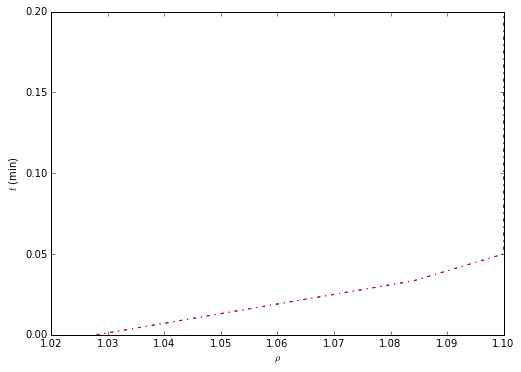

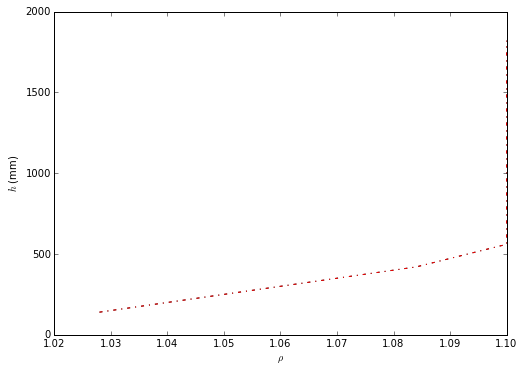

In [4]:
tank.fill()

The numerical object *tank* can be saved in a file tank.h5 with its function *save* (the documentation explains how to control where the file is saved):

In [5]:
if os.path.exists('/tmp/tank.h5'):
    os.remove('/tmp/tank.h5')

In [6]:
tank.save('/tmp')

In [7]:
del(tank)
tank = StratifiedTank(str_path='/tmp')

In [8]:
path_to_tank_h5 = '/tmp/tank.h5'
tank = fld.create_object_from_file(path_to_tank_h5)

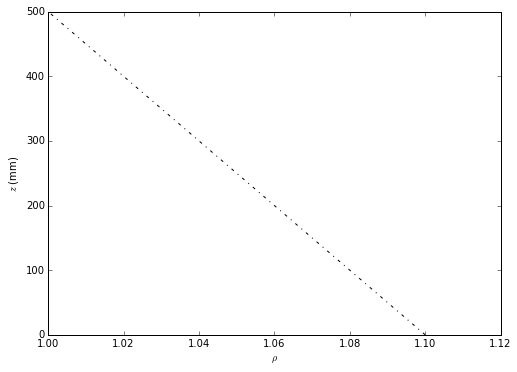

In [9]:
tank.profile.plot()

## Representation of an experiment

In [10]:
from fluiddyn.lab.exp.taylorcouette.linearprofile import ILSTaylorCouetteExp

exp = ILSTaylorCouetteExp(
    rho_max=1.1, N0=1., prop_homog=0.1,
    Omega1=0.4, Omega2=0, R1=150, R2=200,
    description="""This experiment is for the tutorial.""")

[attr for attr in dir(exp) if not attr.startswith('_')]

['board',
 'description',
 'first_creation',
 'name_dir',
 'params',
 'path_save',
 'profiles',
 'save_script',
 'tank',
 'time_start']

In [11]:
print(exp.description)


Experiment in a Taylor-Couette.

This tank is 520 mm high. The radius of the outer cylinder is
approximately   200 mm.


Initially linear stratification (ILS)...

This experiment is for the tutorial.


In [12]:
print(exp.path_save)

/storage2/Dropbox/STC/Exp_data/TaylorCouette/ILS/Exp_Omega1=0.40_N0=1.00_2015-02-28_22-05-05


When this experiment has been created, the description files have been automatically saved in the "right" place. This "right" place being defined in the class of the experiment. Then we can easily reload the experiment.

In [13]:
path_save = exp.path_save
del(exp)
exp = fld.load_exp(path_save[-20:-5])
print(exp.path_save)
print('R2 = {}'.format(exp.params['R2']))

/storage2/Dropbox/STC/Exp_data/TaylorCouette/ILS/Exp_Omega1=0.40_N0=1.00_2015-02-28_22-05-05
R2 = 200
